# Introduction to Neural Network Training in PyTorch
By: Tiffany Vlaar

***
### Load in necessary packages

In [1]:
import numpy as np
import matplotlib.cm as cm
import numpy.random as npr
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

***
## Data creation
The code below creates a __two-class__ spiral dataset with N datapoints, according to the equations  
\begin{align}
dx_1 &= 2 \ \text{t}^p \ \text{cos}(2 a \ \text{t}^p \ \pi) + b\mathcal{N}(0,1) \nonumber \\
dx_2 &= 2 \ \text{t}^p \ \text{sin}(2 a \ \text{t}^p\pi) + b\mathcal{N}(0,1),
\end{align}
where we typically set $p = 0.5$. Increasing $p$ has the effect of increasing the density of data points at the center of the spiral. The parameter $a$ directly sets the number of turns of the spiral and hence the complexity of the problem. We denote $a$ as `spiralturns` in the code below and $b$ as `noise`, as it controls the noise level.

The <font color=green>coordinates</font> of the 2D datapoints are loaded into <font color=green>X</font>, which has shape (N,2). <br>
The corresponding <font color=orange>labels</font> (namely whether each datapoint belongs to class A, label = 0, or class B, label = 1) are loaded into <font color=orange>Y</font>, which is a vector with length N.

In [2]:
def twospirals(datapoints, spiralturns = 2, noise=0.02):
    
    """
     Creates a two spiral planar dataset consisting of the 2D coordinates (X) of the datapoints 
     and the corresponding labels (Y).
     The user can set the number of datapoints (N), the number of turns of the spiral (default = 2) 
     and the noise level (default = 0.02).
    """
    p = 0.5
    N = int(datapoints/2)  
    
    # Generate a (N,1) array with samples from the uniform distribution over [0,1)
    t = np.random.rand(N,1)
    
    # Generate noise-free training data
    dx1 = 2*(t**p)*np.cos(2*spiralturns*(t**p)*np.pi) 
    dx2 = 2*(t**p)*np.sin(2*spiralturns*(t**p)*np.pi)
    
    X = np.vstack((np.hstack((dx1,dx2)),np.hstack((-dx1,-dx2)))) + np.random.randn( 2*N,2) * noise # Coordinates
    Y = np.hstack((np.zeros(N),np.ones(N))) # Corresponding Labels
    
    return torch.Tensor(X),torch.Tensor(Y)  # Return data and labels as torch.Tensors


Visualize the data.
- <font color=red> Class A </font> has label Y = 0. <br>
- <font color=blue> Class B </font> has label Y = 1.

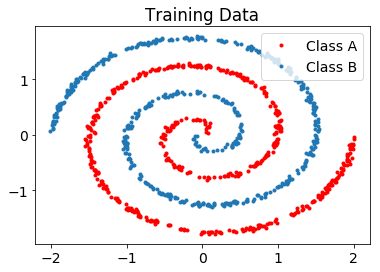

There are 1000 training data points!


In [3]:
x, y = twospirals(1000) 
xplot = x.detach().numpy()
yplot = y.detach().numpy()
plt.rcParams.update({'font.size': 14})
plt.title('Training Data')
plt.plot(xplot[yplot==0,0], xplot[yplot==0,1], '.', label='Class A',color='red')
plt.plot(xplot[yplot==1,0], xplot[yplot==1,1], '.', label='Class B')
plt.legend()
plt.show()
print(f'There are {x.shape[0]} training data points!')

***
### Dataloader
We now want to feed our data into PyTorch's dataloader.
This is useful for batching and shuffling our data.

In [4]:
# Prepare our data into the correct format for PyTorch's Dataloader 
class spirals(Dataset):
    
    def __init__(self,length):
        super().__init__()
        self.length = length
        self.x,self.y = twospirals(self.length)
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, i):
        return self.x[i], self.y[i] 

In [5]:
Ntrain = 1000                # Set the number of training data points
datanew = spirals(Ntrain)    # Generate training data points
batchsize = 50              # The batch size can be set here
dataloader = DataLoader(datanew, batch_size=batchsize, shuffle = True)  # Feed the data into the dataloader.

As you can see in the cell below, this divides the data into batches.
The shuffling occurs after each epoch.

In [6]:
for i,data in enumerate(dataloader):
    x,y = data
    print("x = ", x, ", \ny = ", y, "\n")
    if i == 1:
        print("etc...")
        break


x =  tensor([[ 0.2787,  1.1876],
        [-0.9870, -0.4268],
        [-0.2258,  0.7658],
        [-0.0698,  1.2469],
        [-0.9587,  0.0656],
        [-0.4902, -1.6417],
        [ 0.7672, -1.0910],
        [ 0.0807,  1.2407],
        [ 0.2105,  1.2195],
        [-1.3189,  1.3013],
        [ 0.9914,  0.4961],
        [ 0.4916, -1.2304],
        [-1.7247,  0.8566],
        [-0.4981,  0.0144],
        [ 1.4299,  0.6937],
        [ 0.7270,  0.8340],
        [-1.9321,  0.4104],
        [ 0.0415,  0.7485],
        [-1.8215,  0.6634],
        [ 0.9817,  0.3277],
        [ 1.0721, -1.5251],
        [ 0.7549,  0.8085],
        [-1.0109,  0.9674],
        [-0.2838, -1.1476],
        [ 0.7052,  0.9101],
        [-0.3682,  1.2199],
        [-0.4801,  1.7140],
        [-0.9576,  1.5514],
        [ 0.7076, -1.6873],
        [-0.7105,  0.5214],
        [ 1.4213, -0.2378],
        [ 0.7723,  1.4618],
        [-1.4661,  0.2519],
        [-0.0485,  0.7392],
        [ 1.3376, -1.3624],
        [-0.817

To finalise our data. Let us also create our test dataset.

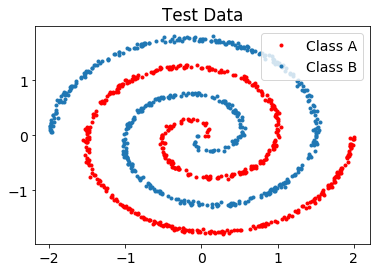

There are 1000 training data points!


In [7]:
Ntest = 1000  # Set the number of test data points
xtest,ytest = twospirals(Ntest) # Create the test data

# Visualize the test dataset
xtestplot = xtest.detach().numpy()
ytestplot = ytest.detach().numpy()
plt.rcParams.update({'font.size': 14})
plt.title('Test Data')
plt.plot(xtestplot[ytestplot==0,0], xtestplot[ytestplot==0,1], '.', label='Class A',color='red')
plt.plot(xtestplot[ytestplot==1,0], xtestplot[ytestplot==1,1], '.', label='Class B')
plt.legend()
plt.show()
print(f'There are {xtest.shape[0]} training data points!')

***
## Neural Network
Let us create a neural network with one hidden layer, consisting of 200 nodes. 

In [8]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.big_pass = nn.Sequential(nn.Linear(2,200), # Input layer (2 nodes) to hidden layer (200 nodes)
                                      nn.ReLU(),        # ReLU activation
                                      nn.Linear(200,1,bias=False), # Hidden layer to output, set bias to False
                                      nn.Sigmoid()      # Pass output through a sigmoid 
                                                        # Sigmoid is appropriate for a binary classification problem
                                     )

    def forward(self, x):
        out = self.big_pass(x)
        return out 

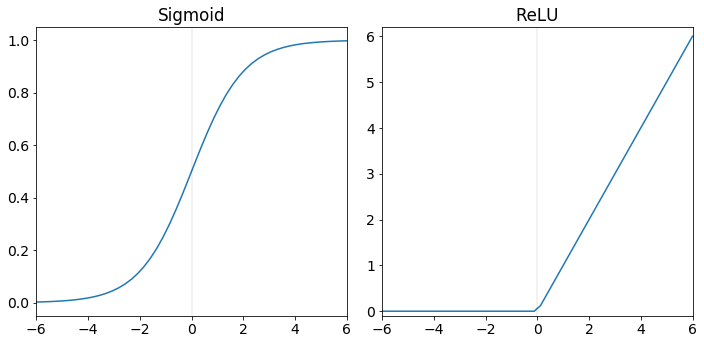

In [9]:
# Reminder what sigmoid and ReLU are
def sigmoid(x):
    return 1/(1+np.exp(-x))

def relu(x):
    return np.maximum(x, 0) 

x = np.linspace(-6,6)

plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
plt.plot(x,sigmoid(x))
plt.plot([0,0],[-0.05,1.05],color="k",linewidth=0.1)
plt.ylim([-0.05,1.05])
plt.xlim([-6,6])
plt.title("Sigmoid")
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(x,relu(x))
plt.plot([0,0],[-0.1,6.2],color="k",linewidth=0.1)
plt.ylim([-0.1,6.2])
plt.xlim([-6,6])
plt.title("ReLU")
plt.tight_layout()

Define a function to compute the accuracy

In [10]:
def accuracy_Nclass(out,y):
    diff = np.count_nonzero(np.round(out.squeeze())-y)
    return (1-(diff/np.size(y)))*100

***
## SGD
We will train the neural network using stochastic gradient descent (SGD). <br>
Relevant hyperparameters for SGD are the timestep $h$ and the batch size. <br>
The batch size was set above when we fed the training data into the dataloader. 

In [11]:
# Parameters
h = 0.1           # Step size
num_epochs = 700   # Number of epochs

RES = [] # Will store the results (accuracy, loss, etc..) in here
total_steps = len(dataloader)  

# Initialize the neural network
NN = Net()

# The binary cross entropy loss combined with a sigmoid, is perfectly suited for a classification problem with 2 classes
criterion = nn.BCELoss()

# Use the SGD optimiser (without regularization, but this can be easily added)
optimizer = torch.optim.SGD(NN.parameters(),lr=h) 

# If desired one can uncomment these lines to re-initialize the weights and biases. 
# for pp in NN.parameters():
#     pp.data = torch.randn(*pp.shape)

# Training
for epoch in range(num_epochs): 
    for i,data in enumerate(dataloader):

        x,y = data   # Load in data
        output = NN(x)

        loss = criterion(output,y.unsqueeze(1)) # Compute the BCE loss between the neural network's output and true labels y

        # Update the weights using backpropagation and optimization algorithm
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate how the neural network is doing and store the results
        if (epoch+1) % 10 == 0 and (i+1) % (Ntrain/batchsize) == 0:

            # Compute the accuracy of the classifier on the training data
            acc = accuracy_Nclass(output.detach().numpy(),y.detach().numpy())

            # Now look at the test data: compute loss and accuracy
            outputtest = NN(xtest)
            loss_test = criterion(outputtest,ytest.unsqueeze(1))
            acc_test = accuracy_Nclass(outputtest.detach().numpy(),ytest.detach().numpy())

            # Store values
            RES += [ [epoch , loss.item(), acc,loss_test.item(),acc_test] ]

            # Print the results every 100 epochs 
            if (epoch+1) % 100 == 0:
                print(f'epoch {epoch}/{num_epochs}, step {i+1}/{total_steps}, with test loss = {loss_test.item()}')
                print("training accuracy",acc,"% and test accuracy",acc_test,"%")

RESSGD = np.vstack(RES)

epoch 99/700, step 20/20, with test loss = 0.4570520222187042
training accuracy 74.0 % and test accuracy 76.9 %
epoch 199/700, step 20/20, with test loss = 0.3273710310459137
training accuracy 86.0 % and test accuracy 87.2 %
epoch 299/700, step 20/20, with test loss = 0.2302539348602295
training accuracy 92.0 % and test accuracy 95.1 %
epoch 399/700, step 20/20, with test loss = 0.18180903792381287
training accuracy 100.0 % and test accuracy 97.39999999999999 %
epoch 499/700, step 20/20, with test loss = 0.12951204180717468
training accuracy 96.0 % and test accuracy 97.3 %
epoch 599/700, step 20/20, with test loss = 0.09568767249584198
training accuracy 98.0 % and test accuracy 98.2 %
epoch 699/700, step 20/20, with test loss = 0.07786194980144501
training accuracy 100.0 % and test accuracy 98.4 %


***Visualize the results***

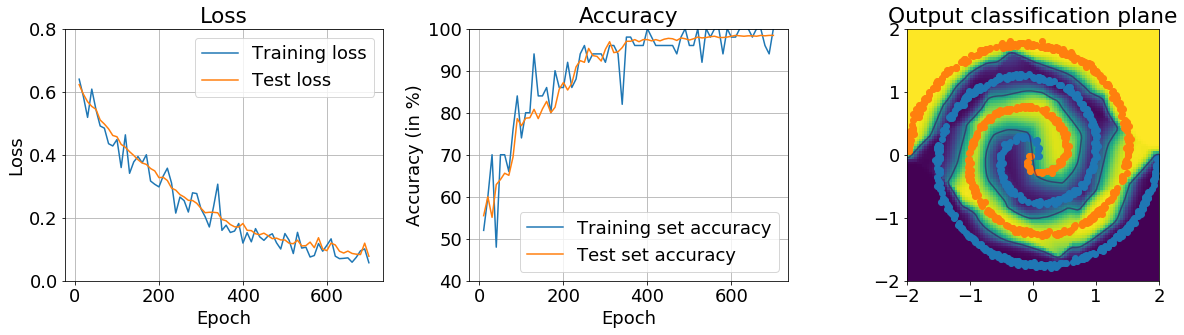

With hyperparameter settings:
Stepsize h = 0.1
Batchsize =  50 , total number of training data 1000


In [12]:
plt.figure(figsize=[17,5]) # Increase the size of the plots
plt.rcParams.update({'font.size': 18}) # Increase the size of the text in the plots

# Plot the training and test loss for a neural network trained using Adam
plt.subplot(1,3,1)
plt.plot( RESSGD[:,0]+1,RESSGD[:,1],label='Training loss')
plt.plot( RESSGD[:,0]+1,RESSGD[:,3],label='Test loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid()
plt.ylim([0,0.8])
plt.title('Loss')
plt.tight_layout()

# Plot the accuracy of the classifier on the training and test dataset
plt.subplot(1,3,2)
plt.plot( RESSGD[:,0]+1,RESSGD[:,2],label='Training set accuracy')
plt.plot( RESSGD[:,0]+1,RESSGD[:,4],label='Test set accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy (in %)')
plt.title('Accuracy')
plt.grid()
plt.ylim([40,100])
plt.tight_layout()

# Plot the classification plane for the current state of the neural network
plt.subplot(1,3,3)
xx = np.linspace(-2,2,100)
X,Y = np.meshgrid(xx,xx)
Z = np.vstack([X.reshape(-1),Y.reshape(-1)])
outSGD = NN(torch.tensor(Z.T).float())

outSGD=outSGD.reshape(100,100)
plt.pcolor(xx,xx,outSGD.data)
plt.contour(xx,xx,outSGD.data,[0.5],alpha=0.5)
plt.axis('square')

kk1 = ytest.reshape(-1)==0
kk2 = ytest.reshape(-1)==1
plt.scatter(xtest[kk1,0],xtest[kk1,1])
plt.scatter(xtest[kk2,0],xtest[kk2,1])
plt.title('Output classification plane')
#plt.tight_layout()
plt.show()

print("With hyperparameter settings:")
print("Stepsize h = %g" %h)
print("Batchsize = ", batchsize, ", total number of training data",Ntrain)

## SGD with momentum

In [13]:
# Parameters
h = 0.1           # Step size
num_epochs = 700   # Number of epochs

RES = [] # Will store the results (accuracy, loss, etc..) in here
total_steps = len(dataloader)  

# Initialize the neural network
NN = Net()

# The binary cross entropy loss combined with a sigmoid, is perfectly suited for a classification problem with 2 classes
criterion = nn.BCELoss()

# Use the SGD optimiser (without regularization, but this can be easily added)
optimizer = torch.optim.SGD(NN.parameters(),lr=h,momentum=0.9) 

# If desired one can uncomment these lines to re-initialize the weights and biases. 
#for pp in NN.parameters():
#    pp.data = torch.randn(*pp.shape)

# Training
for epoch in range(num_epochs): 
    for i,data in enumerate(dataloader):

        x,y = data   # Load in data
        output = NN(x)

        loss = criterion(output,y.unsqueeze(1)) # Compute the BCE loss between the neural network's output and true labels y

        # Update the weights using backpropagation and optimization algorithm
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate how the neural network is doing and store the results
        if (epoch+1) % 10 == 0 and (i+1) % (Ntrain/batchsize) == 0:

            # Compute the accuracy of the classifier on the training data
            acc = accuracy_Nclass(output.detach().numpy(),y.detach().numpy())

            # Now look at the test data: compute loss and accuracy
            outputtest = NN(xtest)
            loss_test = criterion(outputtest,ytest.unsqueeze(1))
            acc_test = accuracy_Nclass(outputtest.detach().numpy(),ytest.detach().numpy())

            # Store values
            RES += [ [epoch , loss.item(), acc,loss_test.item(),acc_test] ]

            # Print the results every 100 epochs 
            if (epoch+1) % 100 == 0:
                print(f'epoch {epoch}/{num_epochs}, step {i+1}/{total_steps}, with test loss = {loss_test.item()}')
                print("training accuracy",acc,"% and test accuracy",acc_test,"%")

RESSGDwithmom = np.vstack(RES)

xx = np.linspace(-2,2,100)
X,Y = np.meshgrid(xx,xx)
Z = np.vstack([X.reshape(-1),Y.reshape(-1)])
outSGDwithmom = NN(torch.tensor(Z.T).float())

epoch 99/700, step 20/20, with test loss = 0.07238133996725082
training accuracy 98.0 % and test accuracy 98.6 %
epoch 199/700, step 20/20, with test loss = 0.0224979929625988
training accuracy 100.0 % and test accuracy 99.0 %
epoch 299/700, step 20/20, with test loss = 0.013312334194779396
training accuracy 100.0 % and test accuracy 99.6 %
epoch 399/700, step 20/20, with test loss = 0.010034176521003246
training accuracy 100.0 % and test accuracy 99.6 %
epoch 499/700, step 20/20, with test loss = 0.008195703849196434
training accuracy 100.0 % and test accuracy 99.6 %
epoch 599/700, step 20/20, with test loss = 0.008004170842468739
training accuracy 100.0 % and test accuracy 99.6 %
epoch 699/700, step 20/20, with test loss = 0.008398358710110188
training accuracy 100.0 % and test accuracy 99.8 %


---
***Compare performance with and without momentum***

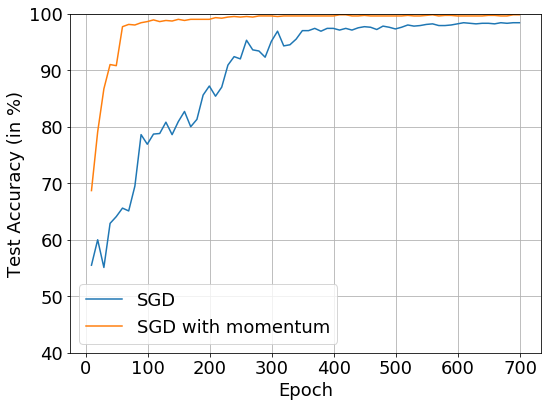

In [14]:
plt.figure(figsize=[8,6])
plt.rcParams.update({'font.size': 18})

plt.plot( RESSGD[:,0],RESSGD[:,4],label='SGD')
plt.plot( RESSGDwithmom[:,0],RESSGDwithmom[:,4],label='SGD with momentum')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (in %)')
plt.grid()
plt.ylim([40,100])
plt.tight_layout()



## With weight decay

In [15]:
# Parameters
h = 0.1           # Step size
num_epochs = 700   # Number of epochs

RES = [] # Will store the results (accuracy, loss, etc..) in here
total_steps = len(dataloader)  

# Initialize the neural network
NN = Net()

# The binary cross entropy loss combined with a sigmoid, is perfectly suited for a classification problem with 2 classes
criterion = nn.BCELoss()

# Use the SGD optimiser 
optimizer = torch.optim.SGD(NN.parameters(),lr=h,momentum=0.9,weight_decay=1e-4) 

# If desired one can uncomment these lines to re-initialize the weights and biases. 
#for pp in NN.parameters():
#    pp.data = torch.randn(*pp.shape)

# Training
for epoch in range(num_epochs): 
    for i,data in enumerate(dataloader):

        x,y = data   # Load in data
        output = NN(x)

        loss = criterion(output,y.unsqueeze(1)) # Compute the BCE loss between the neural network's output and true labels y

        # Update the weights using backpropagation and optimization algorithm
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Evaluate how the neural network is doing and store the results
        if (epoch+1) % 10 == 0 and (i+1) % (Ntrain/batchsize) == 0:

            # Compute the accuracy of the classifier on the training data
            acc = accuracy_Nclass(output.detach().numpy(),y.detach().numpy())

            # Now look at the test data: compute loss and accuracy
            outputtest = NN(xtest)
            loss_test = criterion(outputtest,ytest.unsqueeze(1))
            acc_test = accuracy_Nclass(outputtest.detach().numpy(),ytest.detach().numpy())

            # Store values
            RES += [ [epoch , loss.item(), acc,loss_test.item(),acc_test] ]

            # Print the results every 100 epochs 
            if (epoch+1) % 100 == 0:
                print(f'epoch {epoch}/{num_epochs}, step {i+1}/{total_steps}, with test loss = {loss_test.item()}')
                print("training accuracy",acc,"% and test accuracy",acc_test,"%")

RESSGDwithmomwithWD = np.vstack(RES)

xx = np.linspace(-2,2,100)
X,Y = np.meshgrid(xx,xx)
Z = np.vstack([X.reshape(-1),Y.reshape(-1)])
outSGDwithmomwithWD = NN(torch.tensor(Z.T).float())

epoch 99/700, step 20/20, with test loss = 0.0760481134057045
training accuracy 100.0 % and test accuracy 98.4 %
epoch 199/700, step 20/20, with test loss = 0.04010104387998581
training accuracy 98.0 % and test accuracy 98.9 %
epoch 299/700, step 20/20, with test loss = 0.0340377576649189
training accuracy 100.0 % and test accuracy 99.0 %
epoch 399/700, step 20/20, with test loss = 0.03351806476712227
training accuracy 98.0 % and test accuracy 99.0 %
epoch 499/700, step 20/20, with test loss = 0.033572982996702194
training accuracy 98.0 % and test accuracy 99.1 %
epoch 599/700, step 20/20, with test loss = 0.030669691041111946
training accuracy 100.0 % and test accuracy 99.4 %
epoch 699/700, step 20/20, with test loss = 0.029679372906684875
training accuracy 98.0 % and test accuracy 99.5 %


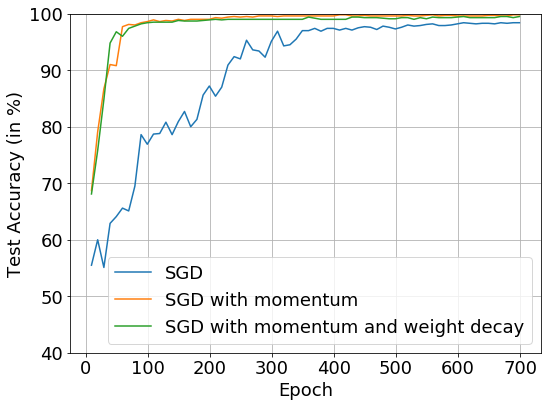

In [16]:
plt.figure(figsize=[8,6])
plt.rcParams.update({'font.size': 18})

plt.plot( RESSGD[:,0],RESSGD[:,4],label='SGD')
plt.plot( RESSGDwithmom[:,0],RESSGDwithmom[:,4],label='SGD with momentum')
plt.plot( RESSGDwithmomwithWD[:,0],RESSGDwithmomwithWD[:,4],label='SGD with momentum and weight decay')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy (in %)')
plt.grid()
plt.ylim([40,100])
plt.tight_layout()

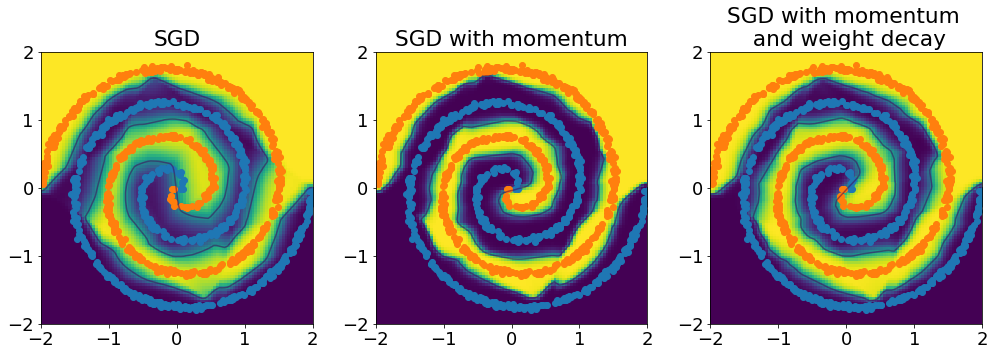

In [17]:
# Plot the classification plane 
plt.figure(figsize=[17,5]) # Increase the size of the plots
plt.rcParams.update({'font.size': 18}) # Increase the size of the text in the plots


xx = np.linspace(-2,2,100)
X,Y = np.meshgrid(xx,xx)
Z = np.vstack([X.reshape(-1),Y.reshape(-1)])
kk1 = ytest.reshape(-1)==0
kk2 = ytest.reshape(-1)==1

plt.subplot(1,3,1)

plt.pcolor(xx,xx,outSGD.data)
plt.contour(xx,xx,outSGD.data,[0.5],alpha=0.5)
plt.scatter(xtest[kk1,0],xtest[kk1,1])
plt.scatter(xtest[kk2,0],xtest[kk2,1])
plt.axis('square')
plt.title("SGD")
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.subplot(1,3,2)
outSGDwithmom=outSGDwithmom.reshape(100,100)
plt.pcolor(xx,xx,outSGDwithmom.data)
plt.contour(xx,xx,outSGDwithmom.data,[0.5],alpha=0.5)
plt.scatter(xtest[kk1,0],xtest[kk1,1])
plt.scatter(xtest[kk2,0],xtest[kk2,1])
plt.axis('square')
plt.title("SGD with momentum")
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.subplot(1,3,3)
outSGDwithmomwithWD=outSGDwithmomwithWD.reshape(100,100)
plt.pcolor(xx,xx,outSGDwithmomwithWD.data)
plt.contour(xx,xx,outSGDwithmomwithWD.data,[0.5],alpha=0.5)
plt.scatter(xtest[kk1,0],xtest[kk1,1])
plt.scatter(xtest[kk2,0],xtest[kk2,1])
plt.axis('square')
plt.title("SGD with momentum \n and weight decay")
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

<hr style="border:5px solid gray"> </hr>

# Custom optimizers


In [18]:
# Parameters
h = 0.1           # Step size
num_epochs = 700   # Number of epochs

RES = [] 
NN = Net()
criterion = nn.BCELoss()

# Training
for epoch in range(num_epochs): 
    for i,data in enumerate(dataloader):

        x,y = data   # Load in data
        output = NN(x)

        loss = criterion(output,y.unsqueeze(1)) # Compute the BCE loss between the neural network's output and true labels y
        loss.backward()
        
        #Custom optimizer
        for param in NN.parameters():
            param.data -= h*param.grad
            param.grad.data.zero_()

        # Evaluate how the neural network is doing and store the results
        if (epoch+1) % 10 == 0 and (i+1) % (Ntrain/batchsize) == 0:

            # Compute the accuracy of the classifier on the training data
            acc = accuracy_Nclass(output.detach().numpy(),y.detach().numpy())

            # Now look at the test data: compute loss and accuracy
            outputtest = NN(xtest)
            loss_test = criterion(outputtest,ytest.unsqueeze(1))
            acc_test = accuracy_Nclass(outputtest.detach().numpy(),ytest.detach().numpy())

            # Store values
            RES += [ [epoch , loss.item(), acc,loss_test.item(),acc_test] ]

            # Print the results every 100 epochs 
            if (epoch+1) % 100 == 0:
                print(f'epoch {epoch}/{num_epochs}, step {i+1}/{total_steps}, with test loss = {loss_test.item()}')
                print("training accuracy",acc,"% and test accuracy",acc_test,"%")

RESSGDcustom = np.vstack(RES)

epoch 99/700, step 20/20, with test loss = 0.4460059106349945
training accuracy 76.0 % and test accuracy 74.4 %
epoch 199/700, step 20/20, with test loss = 0.33635905385017395
training accuracy 80.0 % and test accuracy 85.6 %
epoch 299/700, step 20/20, with test loss = 0.2474077194929123
training accuracy 100.0 % and test accuracy 91.10000000000001 %
epoch 399/700, step 20/20, with test loss = 0.16862180829048157
training accuracy 94.0 % and test accuracy 97.6 %
epoch 499/700, step 20/20, with test loss = 0.127335786819458
training accuracy 100.0 % and test accuracy 97.6 %
epoch 599/700, step 20/20, with test loss = 0.1051672026515007
training accuracy 94.0 % and test accuracy 98.0 %
epoch 699/700, step 20/20, with test loss = 0.07768482714891434
training accuracy 100.0 % and test accuracy 98.4 %


In [19]:
# Parameters
h = 0.1           
momentum = 0.9 
num_epochs = 700  

RES = [] 
NN = Net()
criterion = nn.BCELoss()

mom = {0: [], 1: [],2:[]}
    
for i,param in enumerate(NN.parameters()):
    mom[i] = param.data.clone()
    
# Training
for epoch in range(num_epochs): 
    for i,data in enumerate(dataloader):

        x,y = data   # Load in data
        output = NN(x)

        loss = criterion(output,y.unsqueeze(1)) # Compute the BCE loss between the neural network's output and true labels y
        loss.backward()
        
        #Custom optimizer
        for j,param in enumerate(NN.parameters()):
            mom[j] = mom[j]*momentum+param.grad
            param.data -= h*mom[j]
            param.grad.data.zero_()

        # Evaluate how the neural network is doing and store the results
        if (epoch+1) % 10 == 0 and (i+1) % (Ntrain/batchsize) == 0:

            # Compute the accuracy of the classifier on the training data
            acc = accuracy_Nclass(output.detach().numpy(),y.detach().numpy())

            # Now look at the test data: compute loss and accuracy
            outputtest = NN(xtest)
            loss_test = criterion(outputtest,ytest.unsqueeze(1))
            acc_test = accuracy_Nclass(outputtest.detach().numpy(),ytest.detach().numpy())

            # Store values
            RES += [ [epoch , loss.item(), acc,loss_test.item(),acc_test] ]

            # Print the results every 100 epochs 
            if (epoch+1) % 100 == 0:
                print(f'epoch {epoch}/{num_epochs}, step {i+1}/{total_steps}, with test loss = {loss_test.item()}')
                print("training accuracy",acc,"% and test accuracy",acc_test,"%")

RESSGDwithmomcustom = np.vstack(RES)


epoch 99/700, step 20/20, with test loss = 0.10712124407291412
training accuracy 96.0 % and test accuracy 96.8 %
epoch 199/700, step 20/20, with test loss = 0.03399748355150223
training accuracy 100.0 % and test accuracy 98.5 %
epoch 299/700, step 20/20, with test loss = 0.021462751552462578
training accuracy 96.0 % and test accuracy 99.0 %
epoch 399/700, step 20/20, with test loss = 0.016012828797101974
training accuracy 100.0 % and test accuracy 99.4 %
epoch 499/700, step 20/20, with test loss = 0.012753317132592201
training accuracy 100.0 % and test accuracy 99.6 %
epoch 599/700, step 20/20, with test loss = 0.010791996493935585
training accuracy 100.0 % and test accuracy 99.6 %
epoch 699/700, step 20/20, with test loss = 0.009882078506052494
training accuracy 100.0 % and test accuracy 99.6 %


## With weight decay

In [20]:
# Parameters
h = 0.1           
momentum = 0.9 
weight_decay = 1e-4
num_epochs = 700  

RES = [] 
NN = Net()
criterion = nn.BCELoss()

mom = {0: [], 1: [],2:[]}
    
for i,param in enumerate(NN.parameters()):
    mom[i] = param.data.clone()
    
# Training
for epoch in range(num_epochs): 
    for i,data in enumerate(dataloader):

        x,y = data   # Load in data
        output = NN(x)

        loss = criterion(output,y.unsqueeze(1)) # Compute the BCE loss between the neural network's output and true labels y
        loss.backward()
        
        #Custom optimizer
        for j,param in enumerate(NN.parameters()):
            d_p = param.grad
            if weight_decay != 0:
                d_p = d_p.add(param, alpha=weight_decay)
            
            mom[j] = mom[j]*momentum+d_p
            param.data -= h*mom[j]
            param.grad.data.zero_()

        # Evaluate how the neural network is doing and store the results
        if (epoch+1) % 10 == 0 and (i+1) % (Ntrain/batchsize) == 0:

            # Compute the accuracy of the classifier on the training data
            acc = accuracy_Nclass(output.detach().numpy(),y.detach().numpy())

            # Now look at the test data: compute loss and accuracy
            outputtest = NN(xtest)
            loss_test = criterion(outputtest,ytest.unsqueeze(1))
            acc_test = accuracy_Nclass(outputtest.detach().numpy(),ytest.detach().numpy())

            # Store values
            RES += [ [epoch , loss.item(), acc,loss_test.item(),acc_test] ]

            # Print the results every 100 epochs 
            if (epoch+1) % 100 == 0:
                print(f'epoch {epoch}/{num_epochs}, step {i+1}/{total_steps}, with test loss = {loss_test.item()}')
                print("training accuracy",acc,"% and test accuracy",acc_test,"%")

RESSGDwithmomwithWDcustom = np.vstack(RES)



epoch 99/700, step 20/20, with test loss = 0.12457052618265152
training accuracy 94.0 % and test accuracy 96.6 %
epoch 199/700, step 20/20, with test loss = 0.06578854471445084
training accuracy 98.0 % and test accuracy 98.3 %
epoch 299/700, step 20/20, with test loss = 0.04643608257174492
training accuracy 98.0 % and test accuracy 98.4 %
epoch 399/700, step 20/20, with test loss = 0.04189145565032959
training accuracy 100.0 % and test accuracy 98.4 %
epoch 499/700, step 20/20, with test loss = 0.04008755460381508
training accuracy 100.0 % and test accuracy 98.8 %
epoch 599/700, step 20/20, with test loss = 0.03808439522981644
training accuracy 100.0 % and test accuracy 98.9 %
epoch 699/700, step 20/20, with test loss = 0.04094628617167473
training accuracy 100.0 % and test accuracy 98.8 %


## From Scratch

In [21]:
def derivative_tanh(x):
    return 1/torch.cosh(x)**2

In [22]:
initlayer1 = nn.Linear(2,5)
initlayer2 = nn.Linear(5,2,bias=False)
W1 = initlayer1.weight
W2 = initlayer2.weight
B1 = initlayer1.bias

In [23]:
class myNet():
    def __init__(self,W1,W2,B1):
        self.W1 = W1
        self.B1 = B1
        self.W2 = W2
    
    def forward(self,x):
        self.x = x
        self.fc1 = self.x@self.W1.T+self.B1
        self.layer1 = torch.tanh(self.fc1)
        self.layer2 = self.layer1@self.W2.T
        return self.layer2
    
    def backward(self,y):
        self.y = y
        grad = -(2/self.y.size()[0])*(self.y-self.layer2)
        self.dL_dW2 = grad.T@self.layer1

        grad = (grad@self.W2)*derivative_tanh(self.fc1)
        self.dL_dW1 = grad.T@self.x
        self.dL_dB1 = torch.sum(grad,axis=0)
              
    def train(self,lr):
        self.W1.data -= lr*self.dL_dW1
        self.W2.data -= lr*self.dL_dW2
        self.B1.data -= lr*self.dL_dB1

In [24]:
#XOR problem
inputs = torch.FloatTensor([[0,0],[0,1],[1,0],[1,1]])
targets = torch.FloatTensor([[1,0],[0,1],[0,1],[1,0]])

In [25]:
# At initialization
net = myNet(W1,W2,B1)
outs = net.forward(inputs)
print(outs)

tensor([[ 0.5099,  0.0086],
        [ 0.6749, -0.0674],
        [ 0.5845, -0.2339],
        [ 0.6805, -0.3304]], grad_fn=<MmBackward>)


In [26]:
for i in range(500):
    outs = net.forward(inputs)
    net.backward(targets)
    net.train(lr=0.1)
    if i % 20 == 0:
        print("loss",torch.sum((outs-targets)**2).detach().numpy())
print(" ")
outs = net.forward(inputs).detach()
print("net output \n",outs.numpy())
print(" ")
print("target \n",targets.numpy())


loss 3.9104724
loss 1.9452615
loss 1.9106762
loss 1.8649625
loss 1.7948258
loss 1.6819148
loss 1.4995279
loss 1.2175364
loss 0.8359722
loss 0.44470137
loss 0.17687368
loss 0.055376343
loss 0.014883149
loss 0.003680725
loss 0.00087364734
loss 0.0002036896
loss 4.7284913e-05
loss 1.10470355e-05
loss 2.6309374e-06
loss 6.521052e-07
loss 1.733963e-07
loss 5.1276547e-08
loss 1.7251036e-08
loss 6.570862e-09
loss 2.7501454e-09
 
net output 
 [[ 9.9998957e-01 -7.3015690e-06]
 [ 1.3113022e-05  1.0000089e+00]
 [ 1.6555190e-05  1.0000106e+00]
 [ 9.9998248e-01 -1.0907650e-05]]
 
target 
 [[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]
